Codigo para dataset Casos - Covid

In [1]:
#Importamos librerias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as mdates

In [2]:
# Leemos el dataset
data = pd.read_csv("/content/owid-covid-data.csv", sep=",")

In [3]:
#Limpiamos los datos:
data.index= data.date
data = data[data["location"]== "Argentina"]
serie = data.new_cases
serie= serie.fillna(0)
serie = pd.DataFrame(serie)
serie.index = pd.to_datetime(serie.index)

In [4]:
serie.head()

,new_cases
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


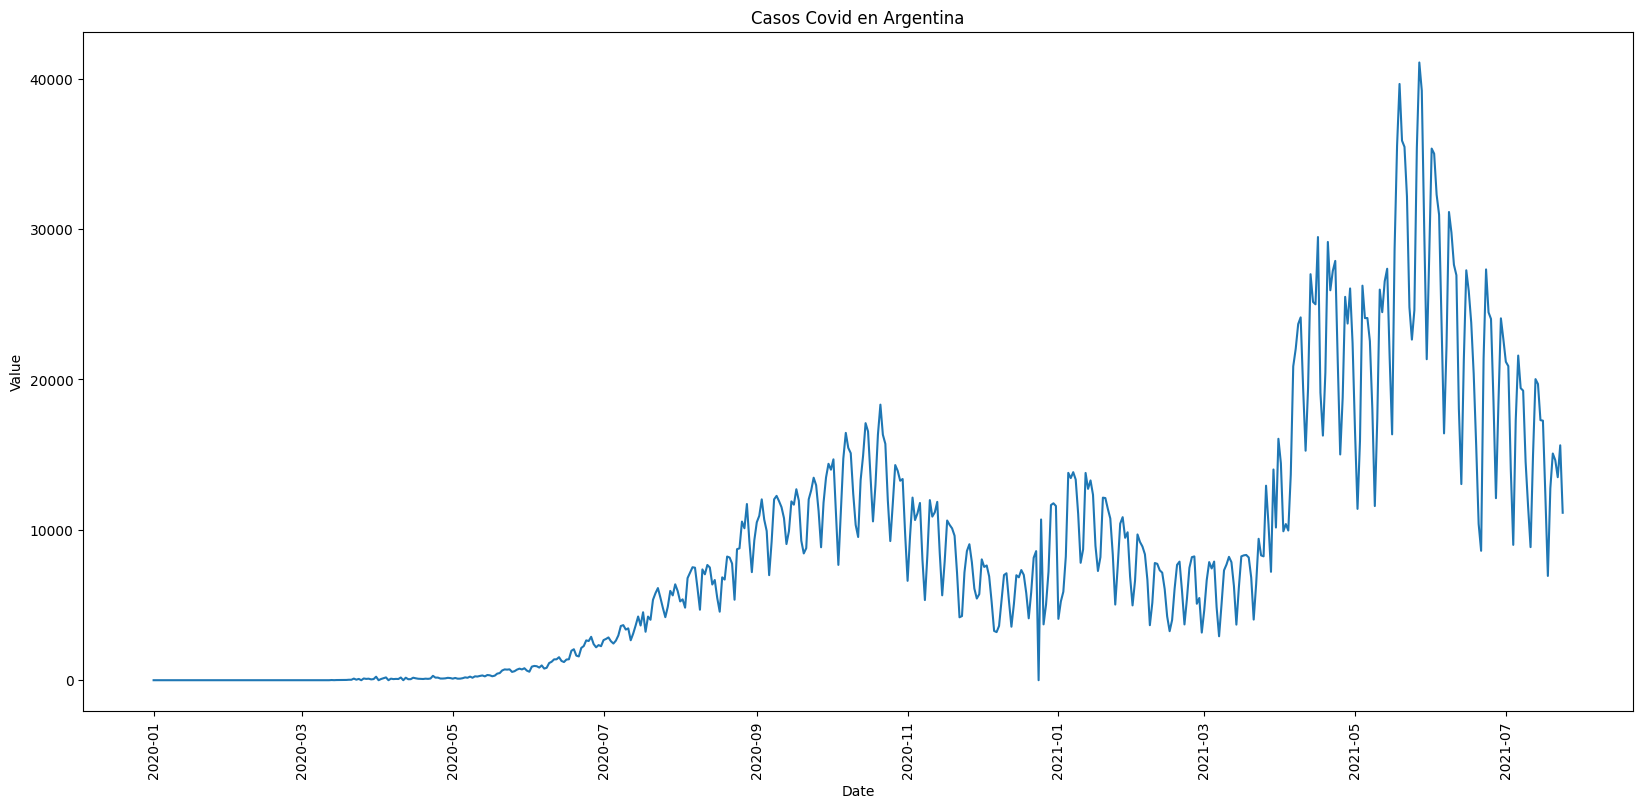

In [5]:
# Gráfico Driving
def plot_data(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(20,9), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.savefig("Image.png")
    plt.show()
plot_data(serie, x=serie.index, y=serie.new_cases, title='Casos Covid en Argentina')

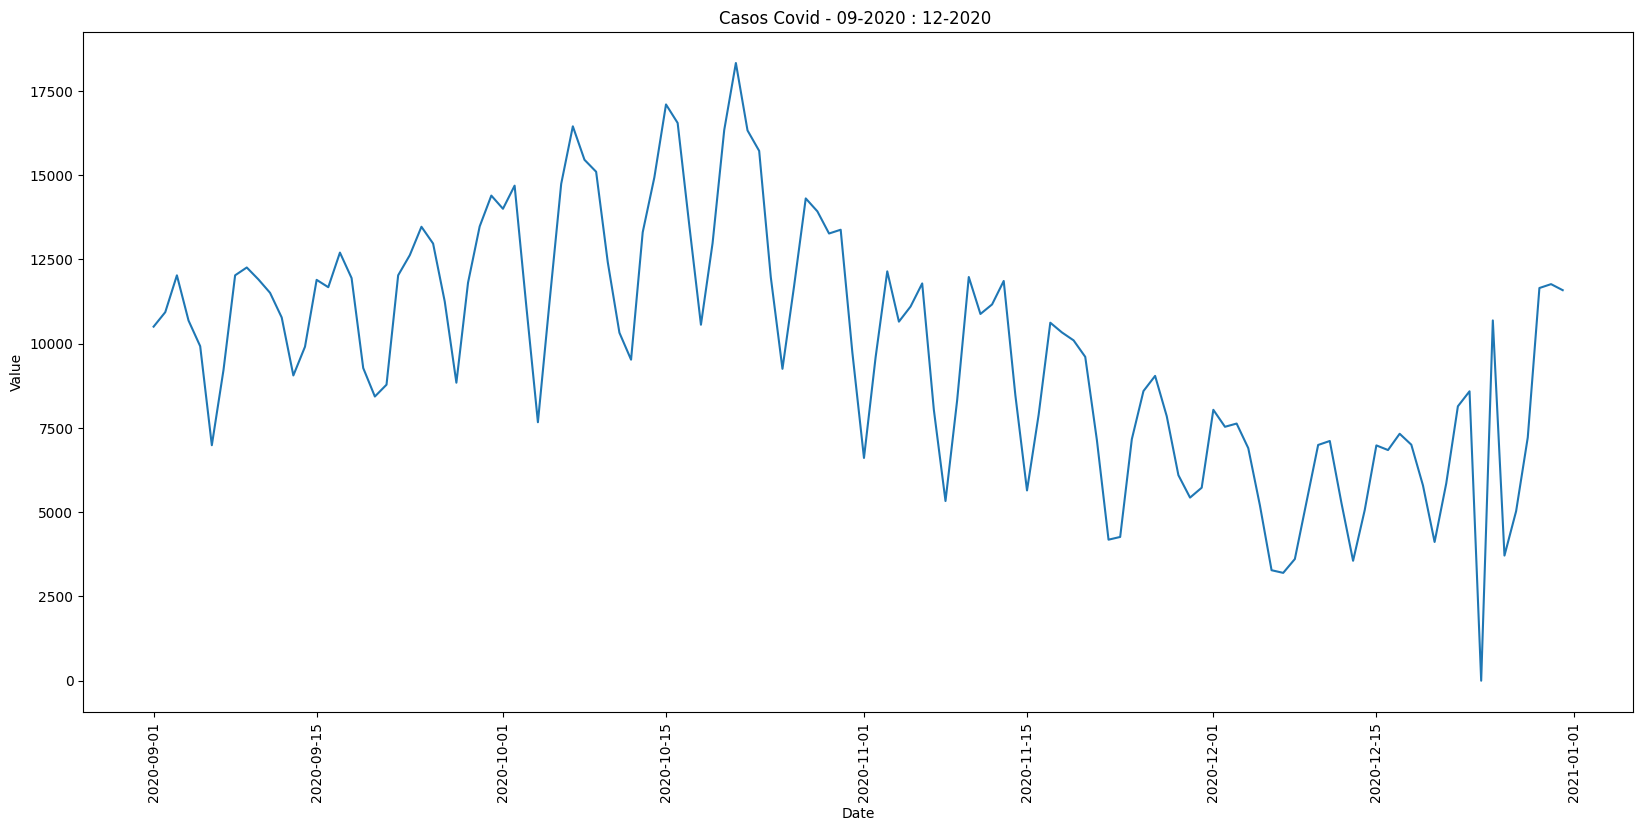

In [6]:
# Zoom sobre el primer ciclo de disminución:
plot_data(serie.loc["2020-09-01":"2020-12-31"], x=serie.loc["2020-09-01":"2020-12-31"].index, y=serie.loc["2020-09-01":"2020-12-31"].new_cases, title='Casos Covid - 09-2020 : 12-2020 ')

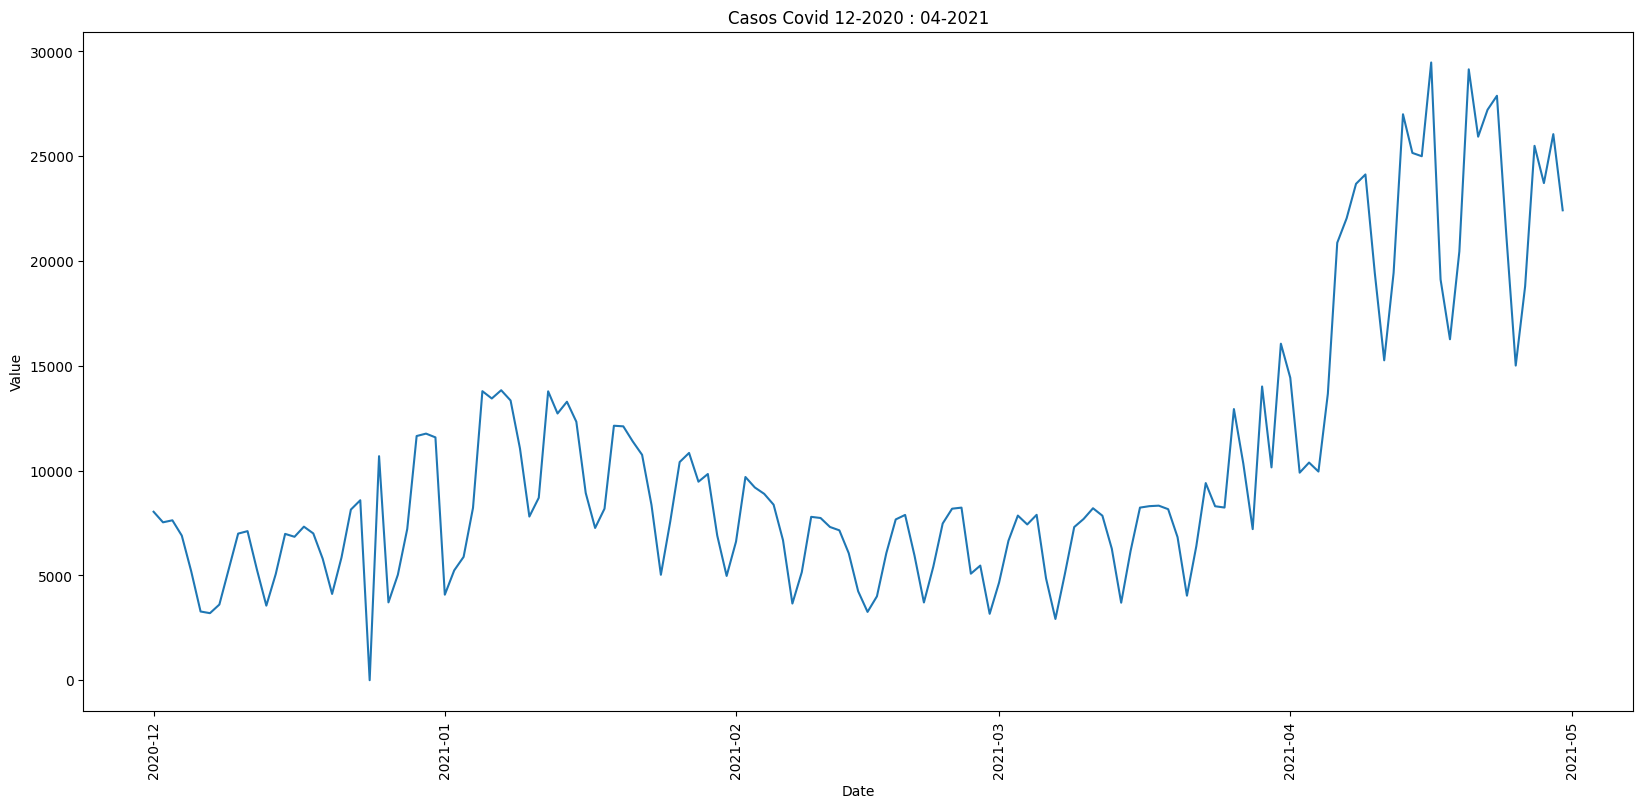

In [7]:
# Zoom sobre segundo ciclo:
plot_data(serie.loc["2020-12-01":"2021-04-30"], x=serie.loc["2020-12-01":"2021-04-30"].index, y=serie.loc["2020-12-01":"2021-04-30"].new_cases, title='Casos Covid 12-2020 : 04-2021')

In [8]:
#Agregamos días de la semana:
serie['Weekday'] = pd.DatetimeIndex(serie.index).to_series().dt.day_name()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


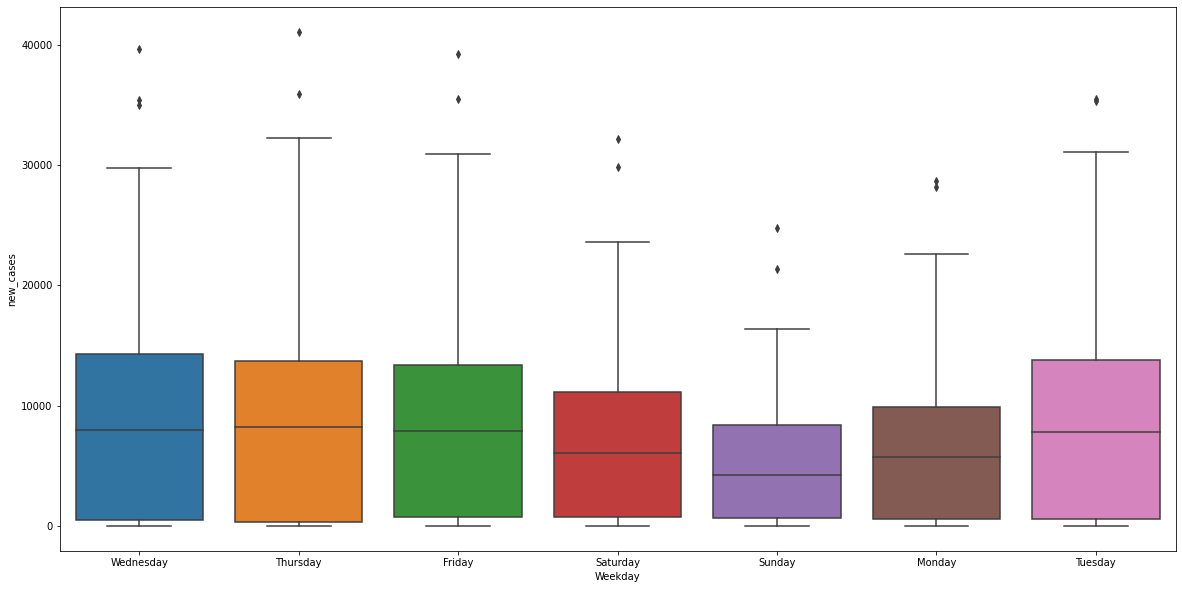

In [9]:
#Boxplot
import seaborn
fig, ax = plt.subplots(figsize=(20,10))
seaborn.boxplot(serie.Weekday, serie.new_cases, ax=ax)
plt.savefig("boxplot.png")

In [10]:
# Convertimos en array
serie = serie.drop(labels="Weekday", axis=1)
serie_array = serie.loc[:, 'new_cases'].values

In [11]:
# Instalamos librerias:
!pip install chart-studio

     |████████████████████████████████| 64 kB 1.6 MB/s 


In [12]:
from chart_studio import plotly
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
import plotly.express as px

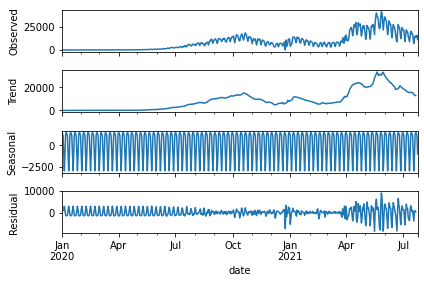

In [14]:
# Grafico descomposición:
result = seasonal_decompose(serie, model="additive")
fig = result.plot()
plt.savefig("Image.png")
plt.show(fig)

In [15]:
# Test KPSS para casos Covid:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, regression="c")
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(serie_array)

KPSS Statistic: 2.0603006477663013
p-value: 0.01
num lags: 19
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



In [16]:
# Test ADF
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary') 

In [17]:
adf_test(serie_array)

ADF Statistic: -1.6849047023116515
p-value: 0.4389063292013725
Critial Values:
   1%, -3.442273822587951
Critial Values:
   5%, -2.8667997388278583
Critial Values:
   10%, -2.5695712667942465
Result: The series is not stationary


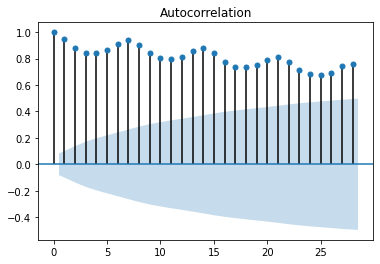

In [18]:
# Grafico de ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(serie)
plt.savefig("Image 2.f.png")
plt.show()

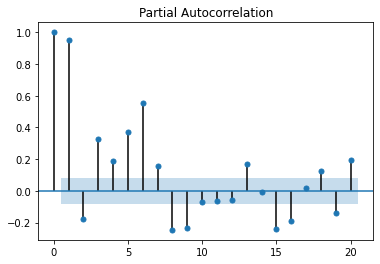

In [19]:
# Grafico de PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(serie, lags=20)
plt.savefig("Image 2.g.png")
plt.show()

In [20]:
# Ljung-Box test, lags= 20
import statsmodels.api as sm

sm.stats.acorr_ljungbox(serie, lags=20)

# P valor para todos los lags es meor a 0,05, por lo tanto rejecteamos la H0 -> Hay al menos una correlacion distinta de 0

(array([ 515.12741645,  960.25438301, 1371.90695043, 1779.24389819,
        2209.65152769, 2694.144011  , 3207.49859545, 3681.51160595,
        4093.10244912, 4469.49497793, 4838.71012504, 5226.36466341,
        5660.2959403 , 6117.20410773, 6532.82658642, 6887.09175799,
        7209.02848378, 7527.96238439, 7860.46070336, 8233.53405105]),
 array([4.86011427e-114, 3.04375799e-209, 3.67374898e-297, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

In [21]:
# Diferenciamos la serie:
serie_dif=serie
serie_dif["Diferences"] = None

In [22]:
for i in range(0,(serie_dif.shape[0]-1)):
  serie_dif.iloc[(i+1),1]=serie_dif.iloc[(i+1),0] - serie_dif.iloc[i,0]

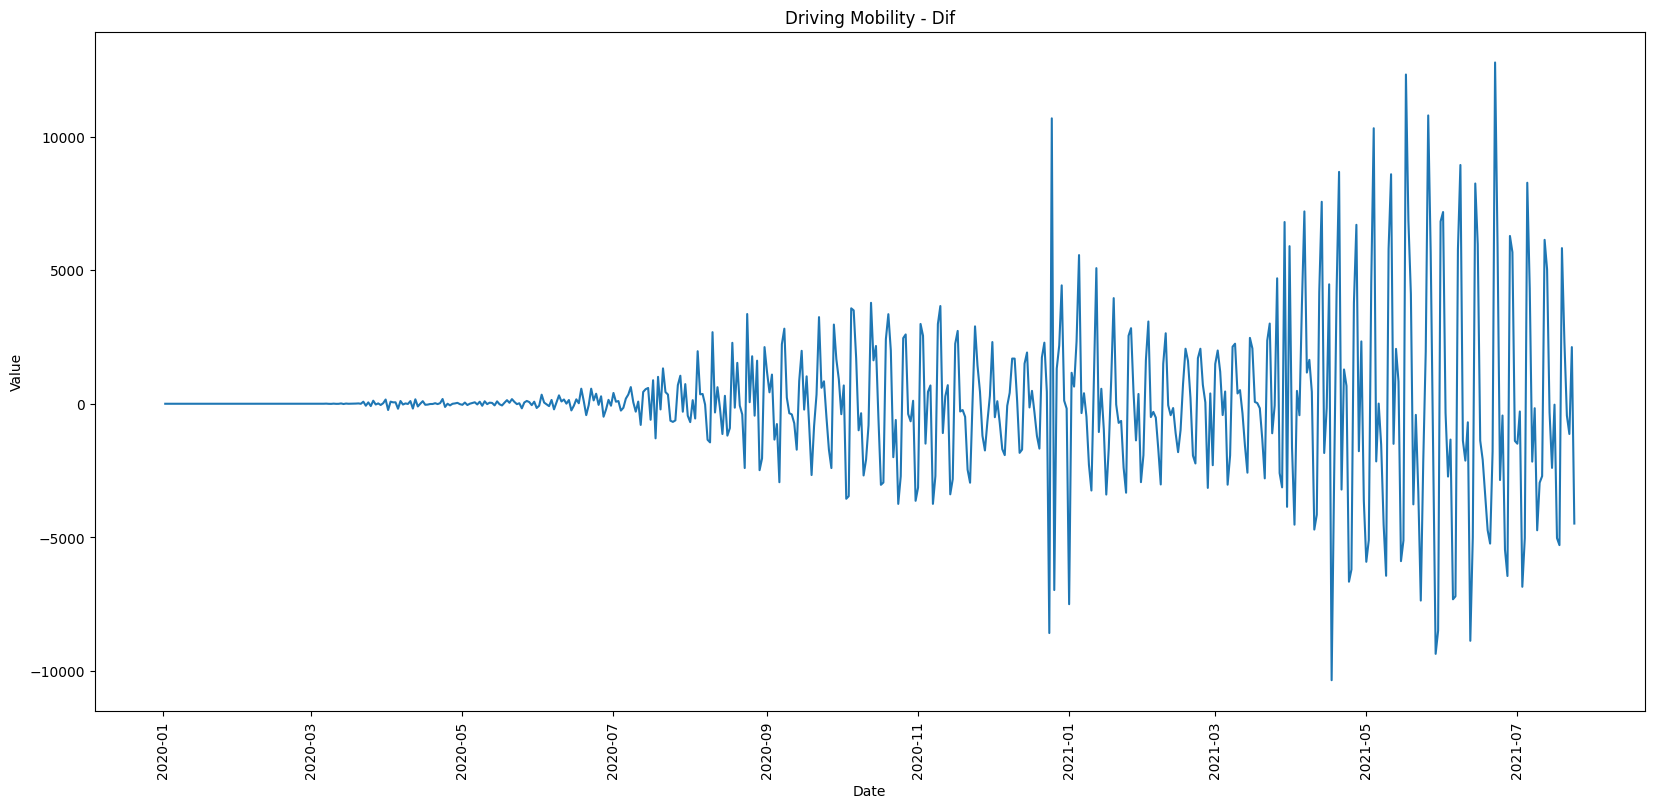

In [23]:
plot_data(serie_dif, x=serie_dif.index, y=serie_dif.Diferences, title='Driving Mobility - Dif')

In [24]:
serie_dif

,new_cases,Diferences
date,,
2020-01-01,0.0,None
2020-01-02,0.0,0
2020-01-03,0.0,0
2020-01-04,0.0,0
2020-01-05,0.0,0
...,...,...
2021-07-20,15077.0,2313
2021-07-21,14632.0,-445
2021-07-22,13500.0,-1132


In [25]:
# Convierto en array para realizar tests de estacionariedad
serie_dif_array = serie_dif.iloc[1:].Diferences

In [26]:
# Test KPSS
kpss_test(serie_dif_array)

KPSS Statistic: 0.06394069785745589
p-value: 0.1
num lags: 19
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



In [27]:
# Test ADF
adf_test(serie_dif_array)

ADF Statistic: -5.113741327781486
p-value: 1.315396007963087e-05
Critial Values:
   1%, -3.442273822587951
Critial Values:
   5%, -2.8667997388278583
Critial Values:
   10%, -2.5695712667942465
Result: The series is stationary


In [28]:
serie_dif=serie_dif["Diferences"].iloc[1:]
serie_dif=pd.DataFrame(serie_dif)

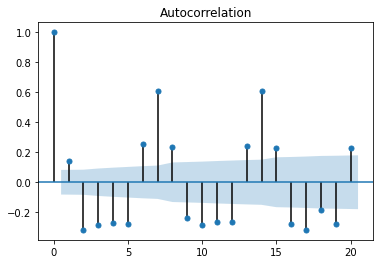

In [29]:
# Grafico de ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(serie_dif.Diferences.tolist(), lags=20)
plt.savefig("Image 4.b.png")
plt.show()

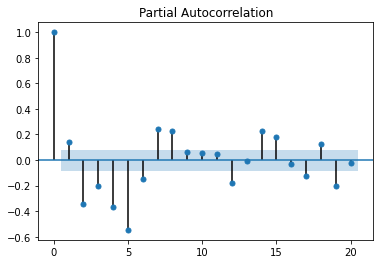

In [30]:
# Grafico de PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(serie_dif.Diferences.tolist(), lags=20)
plt.savefig("Image 4.c.png")
plt.show()

In [31]:
# Ljung-Box test con lag = 20
sm.stats.acorr_ljungbox(serie_dif.Diferences.tolist(), lags=20)

(array([  11.28829052,   69.29526523,  115.64079323,  157.60791386,
         202.82162565,  239.77137373,  456.18395055,  488.50342683,
         522.04244448,  568.52071122,  609.19174349,  649.70688722,
         684.25866993,  902.1336476 ,  932.36398713,  977.46283534,
        1036.68894699, 1056.68897861, 1101.99680385, 1133.21147972]),
 array([7.79974672e-004, 8.96859357e-016, 6.70076531e-025, 4.76322151e-033,
        7.07524662e-042, 6.28141118e-049, 2.08630497e-094, 2.05842614e-100,
        1.09265910e-106, 9.72932566e-116, 1.51369166e-123, 2.53462372e-131,
        7.96090416e-138, 1.50689447e-183, 4.16193446e-189, 7.48093164e-198,
        1.27238120e-209, 5.33745375e-213, 8.59683849e-222, 1.42219998e-227]))

In [32]:
# Importamos librerias
import statsmodels.api

In [33]:
!pip install pmdarima
import pmdarima as pm

     |████████████████████████████████| 1.5 MB 3.6 MB/s 
     |████████████████████████████████| 9.5 MB 44.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [34]:
!pip install statsmodels

In [35]:
# Corremos Auto Arima para elegir un modelo:
stepwise_fit = pm.auto_arima(serie.new_cases, start_p=1, start_q=1, max_p=10, max_q=10, m=7,
                             start_P=0, seasonal=True, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=10014.582, Time=1.71 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=10366.077, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=10160.115, Time=0.94 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=10038.018, Time=1.14 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=10254.260, Time=0.71 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=10016.582, Time=2.17 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=10016.582, Time=3.78 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=10121.034, Time=1.41 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=9.19 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=10053.622, Time=0.94 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=10013.427, Time=2.31 sec
 ARIMA(2,1,1)(0,1,0)[7]             : AIC=inf, Time=1.27 sec
 ARIMA(2,1,1)(1,1,1)[7]             : AIC=10015.421, Time=2.94 sec
 ARIMA(2,1,1)(0,1,2)[7]             : AIC=10015.422, Time=4.66 sec
 ARIMA(2,1,1)(1,1,0)[7]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  571
Model:             SARIMAX(5, 1, 0)x(0, 1, 1, 7)   Log Likelihood               -4997.450
Date:                           Fri, 30 Jul 2021   AIC                          10008.900
Time:                                   05:36:21   BIC                          10039.232
Sample:                                        0   HQIC                         10020.741
                                           - 571                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2873      0.020    -14.519      0.000      -0.326      -0.249
ar.L2         -0.2710      0.024    -11.335      0.000      -0.318      -0.224
ar.L3         -0.2338      0.027     -8.616      0.000      -0.287      -0.181
ar.L4         -0.1879      0.027     -6.875      0.000      -0.242      -0.134
ar.L5         -0.1350      0.027     -4.946      0.000      -0.189      -0.082
ma.S.L7       -0.8241      0.016    -50.232      0.000      -0.856      -0.792
sigma2       2.98e+06   8.84e+04     33.707      0.000    2.81e+06    3.15e+06
===================================================================================
Ljung-Box (Q):                      102.12   Jarque-Bera (JB):              1314.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             394.31   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
serie=serie.drop("Diferences", axis=1)

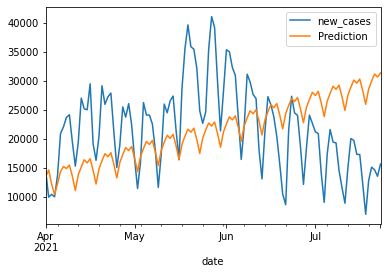

In [37]:
# Entrenamos, testeamos y validamos
train = serie.loc['2020-03-01':'2021-03-31']
test = serie.loc['2021-04-01':'2021-07-23']
stepwise_fit.fit(train)
future_forecast = stepwise_fit.predict(n_periods=len(test))
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])
comparison = pd.concat([test,future_forecast],axis=1)
comparison.plot()
plt.savefig("Model 1.a.png")

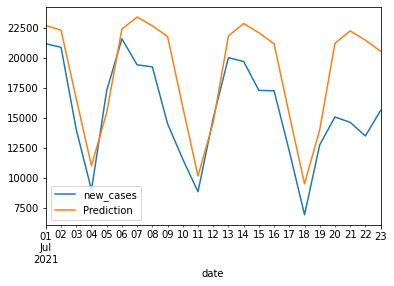

In [38]:
# Entrenamos, testeamos y validamos con otros periodos
train = serie.loc['2020-03-01':'2021-06-30']
test = serie.loc['2021-07-01':'2021-07-23']
stepwise_fit.fit(train)
future_forecast = stepwise_fit.predict(n_periods=len(test))
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])
comparison = pd.concat([test,future_forecast],axis=1)
comparison.plot()
plt.savefig("Model 1.b.png")

In [39]:
# Corremos otro auto arima ampliando la búsqeda:
stepwise_fit_2 = pm.auto_arima(serie, start_p=1, start_q=1, max_p=10, max_q=10, m=7,
                             start_P=0,max_P=10, seasonal=True, d=1, D=1, max_D=10, max_d=10, start_Q=1, max_Q=10, trace=True, with_intercept=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True,
                             maxiter=100)  # set to stepwise

stepwise_fit_2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7] intercept   : AIC=10016.468, Time=4.09 sec
 ARIMA(0,1,0)(0,1,0)[7] intercept   : AIC=10368.021, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7] intercept   : AIC=10162.115, Time=1.15 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=10039.976, Time=1.84 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=10366.077, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[7] intercept   : AIC=10256.120, Time=1.36 sec
 ARIMA(1,1,1)(1,1,1)[7] intercept   : AIC=10018.468, Time=4.28 sec
 ARIMA(1,1,1)(0,1,2)[7] intercept   : AIC=10018.468, Time=7.63 sec
 ARIMA(1,1,1)(1,1,0)[7] intercept   : AIC=10123.938, Time=1.61 sec
 ARIMA(1,1,1)(1,1,2)[7] intercept   : AIC=inf, Time=19.91 sec
 ARIMA(1,1,0)(0,1,1)[7] intercept   : AIC=10055.605, Time=1.18 sec
 ARIMA(2,1,1)(0,1,1)[7] intercept   : AIC=10015.305, Time=4.55 sec
 ARIMA(2,1,1)(0,1,0)[7] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(2,1,1)(1,1,1)[7] intercept   : AIC=10017.299, Time=4.99 sec
 ARIMA(2,1,1)(0,1,2)[7] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  571
Model:             SARIMAX(2, 1, 2)x(0, 1, 1, 7)   Log Likelihood               -4993.385
Date:                           Fri, 30 Jul 2021   AIC                           9998.771
Time:                                   05:41:55   BIC                          10024.771
Sample:                                        0   HQIC                         10008.921
                                           - 571                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4425      0.041     34.933      0.000       1.362       1.523
ar.L2         -0.5807      0.036    -16.098      0.000      -0.651      -0.510
ma.L1         -1.7626      0.033    -53.315      0.000      -1.827      -1.698
ma.L2          0.8524      0.028     30.156      0.000       0.797       0.908
ma.S.L7       -0.8137      0.018    -45.935      0.000      -0.848      -0.779
sigma2       2.94e+06   8.59e+04     34.213      0.000    2.77e+06    3.11e+06
===================================================================================
Ljung-Box (Q):                       97.30   Jarque-Bera (JB):              1551.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             385.78   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.78e+14. Standard errors may be unstable.
"""

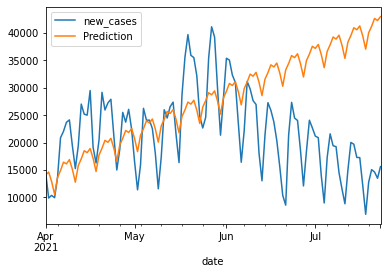

In [40]:
# Entrenamos, testeamos y validamos:
train = serie.loc['2020-03-01':'2021-03-31']
test = serie.loc['2021-04-01':'2021-07-23']
stepwise_fit_2.fit(train)
future_forecast = stepwise_fit_2.predict(n_periods=len(test))
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])
comparison = pd.concat([test,future_forecast],axis=1)
comparison.plot()
plt.savefig("Model 2.a.png")

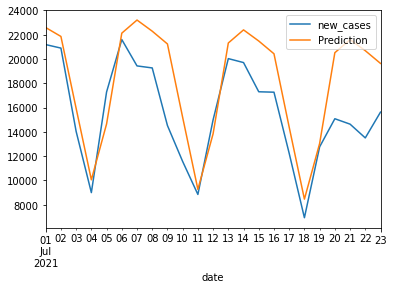

In [41]:
# Entrenamos, testeamos y validamos con otros periodos:
train = serie.loc['2020-03-01':'2021-06-30']
test = serie.loc['2021-07-01':'2021-07-23']
stepwise_fit_2.fit(train)
future_forecast = stepwise_fit_2.predict(n_periods=len(test))
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])
comparison = pd.concat([test,future_forecast],axis=1)
comparison.plot()
plt.savefig("Model 2.b.png")

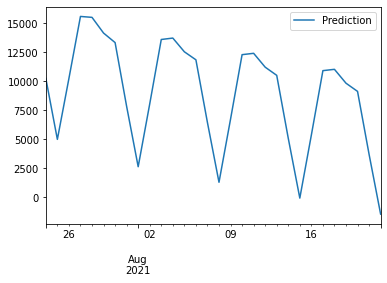

In [42]:
#Prediccion:

dates_predict = pd.date_range("2021-07-24","2021-08-22",freq='d')
train = serie.loc['2020-03-01':'2021-07-23']
stepwise_fit_2.fit(train)
future_forecast_2 = stepwise_fit_2.predict(n_periods=30)
future_forecast_2 = pd.DataFrame(future_forecast_2,index = dates_predict, columns=["Prediction"])
future_forecast_2.plot()
plt.savefig("Prediccion Casos Covid.png")

In [52]:
future_forecast_2.to_csv("/content/sample_data/prediccion_casos.csv")

TypeError: ignored